In [100]:
# all needed imports
import os
import pandas as pd
import pickle
from IPython.display import display

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler

In [101]:
# loading the data
recording_location = './'

all_features_csv = os.path.join(recording_location, '../Data/FeatureFiles10Sec/feature_list_all.csv')
df = pd.read_csv(all_features_csv)

In [102]:
print(len(df))

385


In [103]:
# Preprocessing and only keeping relevant data
# X = df[["meanFix", "maxFix", "varFix", "xDir", "yDir", "fixDensPerBB"]]
X = df.drop(columns=['label','participant_id','duration'])
y = df['label']

# Instead of strings for the label use 1-3
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = MaxAbsScaler() #StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [104]:
# Build a neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [105]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
          callbacks=[early_stopping, lr_reduction])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3611 - loss: 1.1125 - val_accuracy: 0.4194 - val_loss: 1.0844 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4403 - loss: 1.0671 - val_accuracy: 0.4194 - val_loss: 1.0544 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4439 - loss: 1.0665 - val_accuracy: 0.7419 - val_loss: 1.0188 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5396 - loss: 1.0074 - val_accuracy: 0.7419 - val_loss: 0.9749 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6201 - loss: 0.9804 - val_accuracy: 0.7419 - val_loss: 0.9289 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7466 - loss: 0.8761 - val_accuracy: 0.7581 - val_loss: 0.8766 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - loss: 0.8410 - val_accuracy: 0.7419

In [106]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9558 - loss: 0.2409  
Loss: 0.2981543242931366, Accuracy: 0.9350649118423462


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
Confusion Matrix:
[[22  0  1]
 [ 0 31  1]
 [ 3  0 19]]


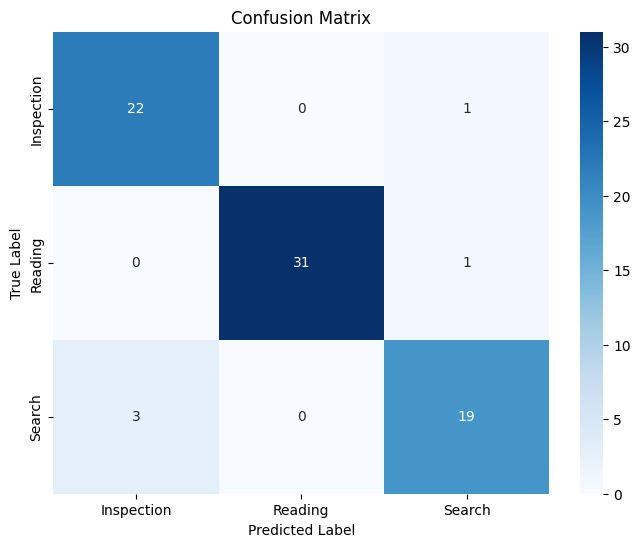

In [107]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for X_test
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix (optional for a quick check)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()

In [108]:
# export the model
# model.save('model.keras')

# export the labels

# Save the LabelEncoder
# with open('label_encoder.pkl', 'wb') as f:
#     pickle.dump(label_encoder, f)